In [1]:
import pyvista as pv
import numpy as np
from scipy.interpolate import make_interp_spline
pv.set_jupyter_backend('client')
from generate_noisy_pipe import *
import matplotlib.pyplot as plt

# Noisy cylinder

-0.3732930722549129 0.33825485866537014 0


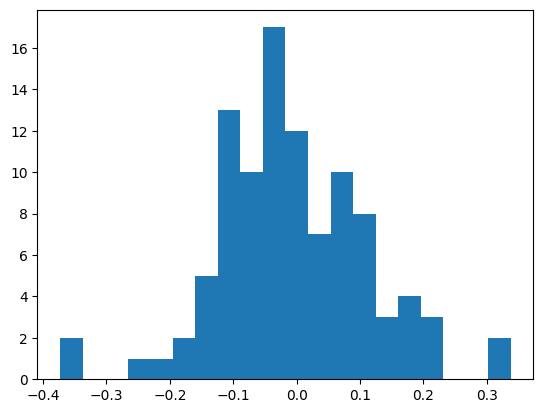

In [28]:
h_max = 0
h_min = 0
num_error = 0
h = []
for i in range(0,100):
    with open('SP/SP_'+str(i).zfill(4)+'/mesh.log', 'r') as file:
        lines = file.readlines()
        h.append(float(lines[1].split(' ')[0]))
        # print(i, lines[1], lines[7])
        if 'Generated mesh' not in lines[7]:
            num_error+=1
        # if float(lines[1].split(' ')[0]) > 0.25 or float(lines[1].split(' ')[0]) < -0.25:
        #     print(i, lines[1], lines[7])
        h_max = np.max([h_max,float(lines[1].split(' ')[0])])
        h_min = np.min([h_min,float(lines[1].split(' ')[0])])
print(h_min,h_max,num_error)

plt.hist(h,bins=20);

In [29]:
# Define mesh path
# case_path = '/home/dana/Documents/SimVascular/svMultiPhysics/NoisyPipe/mesh_test/'
case_path = '/home/dana/Documents/SimVascular/svMultiPhysics/NoisyPipe/SP/SP_0037/'
mesh_path = case_path + 'mesh/'
geom_path = case_path + 'geom/'

In [30]:
# Load geometry files
fluid = pv.read(geom_path + "fluid.vtp")
# solid = pv.read(geom_path + "solid.vtp")
# combined = pv.read(geom_path + "combined.vtp")
# regions = np.load(geom_path + "region.npy")
spline = np.load(geom_path + "spline.npy")
contours = np.load(geom_path + "contours.npy")
# Visualize
pl = pv.Plotter()
pl.add_mesh(fluid, cmap='tab10',show_edges=True)
# pl.add_mesh(solid, cmap='tab10',show_edges=True)
pl.add_points(spline, color='red')
for i in range(contours.shape[0]):
    pl.add_points(contours[i,:,:], color='blue')

pl.show()

Widget(value='<iframe src="http://localhost:38813/index.html?ui=P_0x766c401c6f00_11&reconnect=auto" class="pyv…

In [31]:
# Load fluid
f_vol = pv.read(mesh_path + "fluid/mesh-complete.vtu")
f_inlet = pv.read(mesh_path + "fluid/mesh-surfaces/inlet.vtp")
f_outlet = pv.read(mesh_path + "fluid/mesh-surfaces/outlet.vtp")
f_interface = pv.read(mesh_path + "fluid/mesh-surfaces/interface.vtp")
f_vol_c = f_vol.clip(normal='y',origin=(0,0,0),invert=False)
# f_inlet = f_inlet.clip(normal='y',origin=(0,0,0),invert=False)
# f_outlet = f_outlet.clip(normal='y',origin=(0,0,0),invert=False)
# f_interface = f_interface.clip(normal='x',origin=(0,0,0),invert=False)

# Load solid
# s_vol = pv.read(mesh_path + "solid/mesh-complete.vtu")
# s_inlet = pv.read(mesh_path + "solid/mesh-surfaces/inlet.vtp")
# s_outlet = pv.read(mesh_path + "solid/mesh-surfaces/outlet.vtp")
# s_interface = pv.read(mesh_path + "solid/mesh-surfaces/interface.vtp")
# s_outside = pv.read(mesh_path + "solid/mesh-surfaces/outside.vtp")
# s_vol_c = s_vol.clip(normal='y',origin=(0,0,0),invert=False)
# s_inlet = s_inlet.clip(normal='y',origin=(0,0,0),invert=False)
# s_outlet = s_outlet.clip(normal='y',origin=(0,0,0),invert=False)
# s_interface = s_interface.clip(normal='y',origin=(0,0,0),invert=False)
# s_outside = s_outside.clip(normal='y',origin=(0,0,0),invert=False)


# Some camera stuff
cam = [(0,-10,0),(0,0,0),(0,0,1)]#[(13,3,3),(3,0,0),(0,0,1)]
cam2 = [(0,-25,0),(0,0,0),(0,0,1)]

plotter1 = pv.Plotter(shape=(1,2),off_screen=True)
# Volume mesh
plotter1.subplot(0,0)
plotter1.camera_position = cam
plotter1.add_mesh(f_vol_c, color='cyan', edge_opacity=0.5, show_edges=True) # Fluid
# plotter1.add_mesh(s_vol_c, color='magenta', edge_opacity=0.5, show_edges=True) # Solid
plotter1.add_text("Volume Mesh", font_size=12)
plotter1.add_axes()
# Surface meshes
plotter1.subplot(0,1)
plotter1.camera_position = cam
# Fluid
plotter1.add_mesh(f_inlet, color='cyan', opacity=0.5, edge_opacity=0.5, show_edges=True)
plotter1.add_mesh(f_outlet, color='magenta', opacity=0.5, edge_opacity=0.5, show_edges=True)
plotter1.add_mesh(f_interface, color='green', opacity=0.5, edge_opacity=0.5, show_edges=True)
# Solid
# plotter1.add_mesh(s_inlet, color='cyan', edge_opacity=0.5, show_edges=True)
# plotter1.add_mesh(s_outlet, color='magenta', edge_opacity=0.5, show_edges=True)
# plotter1.add_mesh(s_outside, color='red', edge_opacity=0.5, show_edges=True)
plotter1.add_text("Surface Mesh", font_size=12)
plotter1.add_axes()
plotter1.show()
# plotter1.save_graphic('mesh.eps')

plotter2 = pv.Plotter(shape=(1,2))
# Whole geometries
plotter2.subplot(0,0)
plotter2.camera_position = cam2
plotter2.add_mesh(f_vol, color='cyan', opacity=0.5, show_edges=False) # Fluid
# plotter2.add_mesh(s_vol_c, color='magenta', opacity=0.5, show_edges=False) # Solid
plotter2.add_axes()
plotter2.subplot(0,1)
plotter2.add_mesh(f_vol, color='cyan', opacity=0.5, show_edges=False) # Fluid
# plotter2.add_mesh(s_vol, color='magenta', opacity=0.5, show_edges=False) # Solid
plotter2.add_axes()
plotter2.show()
# plotter2.save_graphic('geom.eps')

Widget(value='<iframe src="http://localhost:38813/index.html?ui=P_0x766c3baad2e0_12&reconnect=auto" class="pyv…

Widget(value='<iframe src="http://localhost:38813/index.html?ui=P_0x766c3baad0d0_13&reconnect=auto" class="pyv…

Approx. smallest cell volume: 1.1748253673638869e-07
Approx. smallest cell length: 0.004897687882329498
Approx. dt for CFL=1: 4.897687882329498e-05


/home/dana/Documents/SimVascular/svMultiPhysics/my_env/lib/python3.12/site-packages/pyvista/core/filters/data_set.py:5650: PyVistaDeprecationWarning: This filter is deprecated. Use `cell_quality` instead. Note that this
new filter does not include an array named ``'CellQuality'`
  warnings.warn(msg, PyVistaDeprecationWarning)


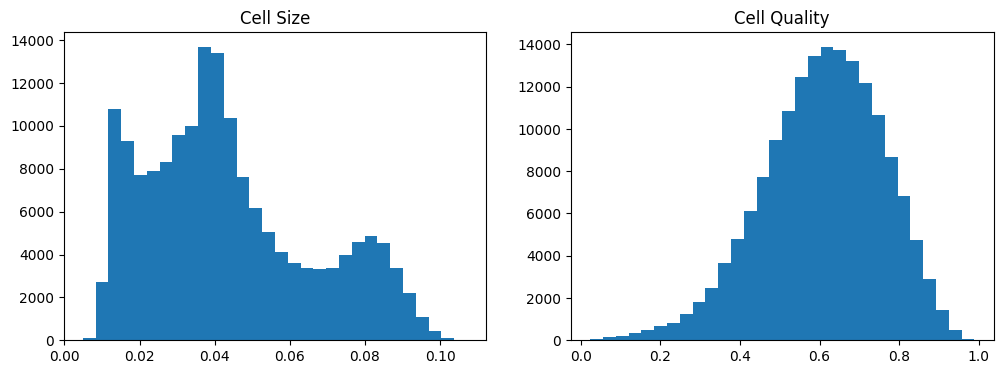

In [16]:
import matplotlib.pyplot as plt 
# plt.hist(f_vol.compute_cell_sizes())
f = f_vol.compute_cell_sizes()
f = f.compute_cell_quality()
fig,ax=plt.subplots(1,2,figsize=(12,4))
ax[0].hist(f['Volume']**(1/3), bins=30)#, range=(0, 0.01))
ax[0].set_title('Cell Size')
ax[1].hist(f['CellQuality'], bins=30)#, range=(0, 0.01))
ax[1].set_title('Cell Quality')
delta_min = np.min(f['Volume'])**(1/3)
print('Approx. smallest cell volume: ' + str(np.min(f['Volume'])))
print('Approx. smallest cell length: ' + str(delta_min))
print('Approx. dt for CFL=1: ' + str(delta_min/100.)) 

In [261]:
f

UnstructuredGrid (0x7a26c4581780)
  N Cells:    72373
  N Points:   19476
  X Bounds:   -5.000e+00, 4.896e+00
  Y Bounds:   -2.429e-17, 1.099e+00
  Z Bounds:   -1.099e+00, 1.099e+00
  N Arrays:   6

In [304]:
cases = np.arange(10,16)
pl = pv.Plotter(shape=(2,3),window_size=[1200,600])

for i,case in enumerate(cases):
    # Define mesh path
    case_path = '/home/dana/Documents/SimVascular/svMultiPhysics/NoisyPipe/SP/SP_' + str(case).zfill(4) + '/'
    mesh_path = case_path + 'mesh/'
    geom_path = case_path + 'geom/'

    # Load geometry files
    fluid = pv.read(geom_path + "fluid.vtp")
    spline = np.load(geom_path + "spline.npy")
    contours = np.load(geom_path + "contours.npy")

    # Visualize
    pl.subplot(i//3,np.mod(i,3))
    pl.add_mesh(fluid, cmap='tab10',show_edges=False, show_scalar_bar=False, opacity=0.7)
    # pl.add_mesh(solid, cmap='tab10',show_edges=True)
    # pl.add_points(spline, color='red')
    # for i in range(contours.shape[0]):
    #     pl.add_points(contours[i,:,:], color='blue')

pl.link_views()
pl.show()

Widget(value='<iframe src="http://localhost:39019/index.html?ui=P_0x7a2697c74dd0_87&reconnect=auto" class="pyv…